In [1]:
# only pandas is required
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')

In [3]:
def rename_col(s):
    s = s.replace(' ', '_')
    s = s.replace('-', '_')
    a = s.split('_')
    for i in range(len(a)):
        if not all([c == c.upper() for c in a[i]]):
            a[i] = a[i].capitalize()
    return '_'.join(a)

df.columns = [rename_col(c) for c in df.columns]
df.columns

Index(['Show_Id', 'Type', 'Title', 'Director', 'Cast', 'Country', 'Date_Added',
       'Release_Year', 'Rating', 'Duration', 'Listed_In', 'Description'],
      dtype='object')

In [4]:
df.head()

,Show_Id,Type,Title,Director,Cast,Country,Date_Added,Release_Year,Rating,Duration,Listed_In,Description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


# Distribution of Content by Type

How does the distribution of movies compare to TV shows on Amazon Prime?

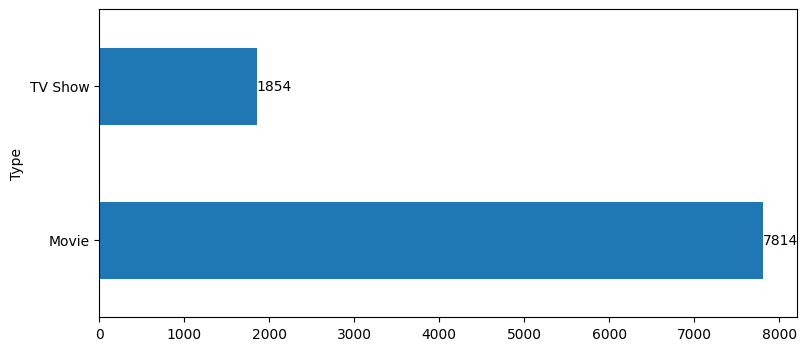

In [5]:
ax = df.Type.value_counts().plot(kind='barh', figsize=(9,4))

for container in ax.containers:
    ax.bar_label(container)

# Release Year Analysis
What is the trend in the number of titles added over the years? Are newer or older titles more prevalent?


<Axes: xlabel='Release_Year'>

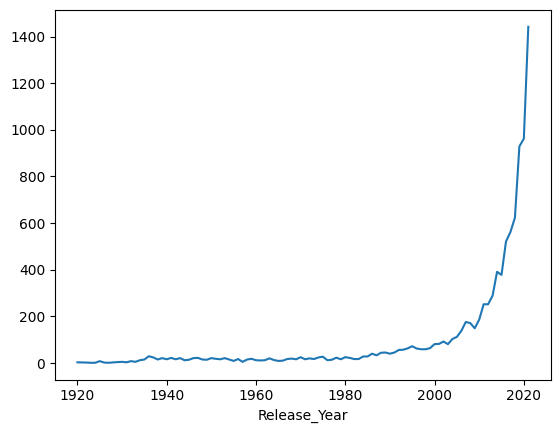

In [6]:
df.groupby('Release_Year').count()['Show_Id'].plot(kind='line')

# Country-specific Content
Which countries produce the most content available on Amazon Prime? How does content variety differ by country?


<Axes: ylabel='Country'>

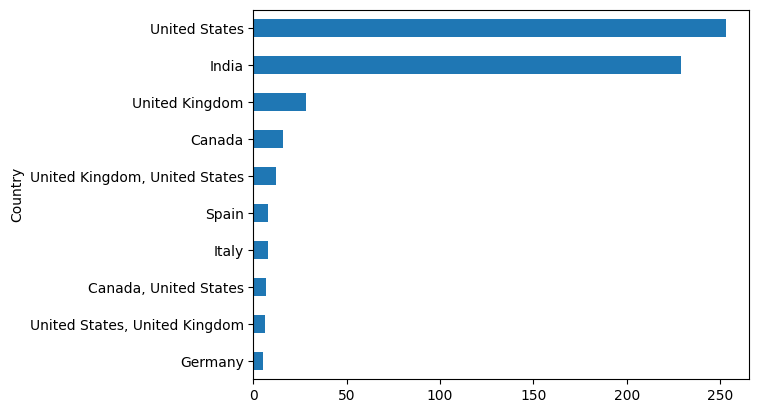

In [7]:
df.groupby('Country').count()['Show_Id'].nlargest(10).sort_values().plot(kind='barh')

# Ratings Analysis
What are the most common ratings (e.g., PG, 18+) for titles on Amazon Prime, and what does this suggest about the target audience?


<Axes: ylabel='Rating'>

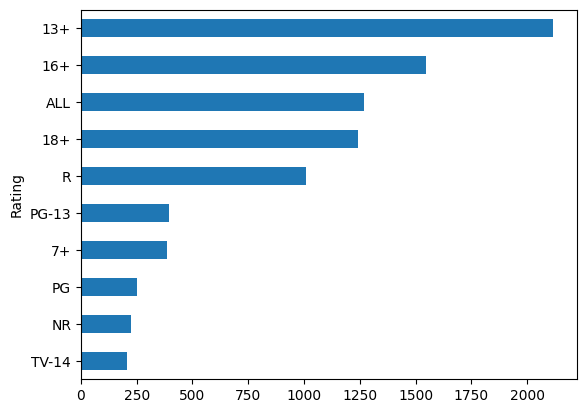

In [8]:
df.groupby('Rating').count().Show_Id.nlargest(10).sort_values().plot(kind='barh')

# Duration Insights

What is the typical duration of movies versus TV shows? Are there any trends in duration over the years?


In [9]:
df.Type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
a = df.Duration.str.split(expand=True)
df['Duration_Num'] = a[0].astype(int)
df['Duration_Unit'] = a[1]

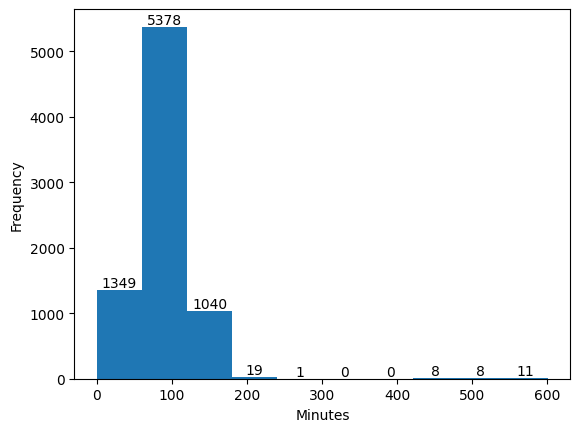

In [11]:
ax = df[df.Type == 'Movie'].Duration_Num.plot(kind='hist', xlabel='Minutes')
for container in ax.containers:
    ax.bar_label(container)

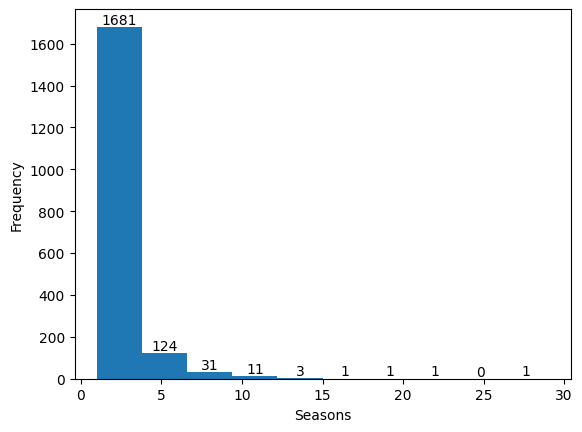

In [12]:
ax = df[df.Type == 'TV Show'].Duration_Num.plot(kind='hist', xlabel='Seasons')
for container in ax.containers:
    ax.bar_label(container)

# Genre Popularity

What genres are most common on Amazon Prime? Are there specific genres that are trending in recent additions?


In [13]:
df.Listed_In.head()

0              Comedy, Drama
1       Drama, International
2    Action, Drama, Suspense
3                Documentary
4             Drama, Fantasy
Name: Listed_In, dtype: object

In [14]:
df.Listed_In[df.Listed_In.str.contains('and Culture')]

22        Arts, Entertainment, and Culture, Comedy, Drama
53      Arts, Entertainment, and Culture, Comedy, Talk...
93               Arts, Entertainment, and Culture, Comedy
94      Arts, Entertainment, and Culture, Comedy, Spec...
107                      Arts, Entertainment, and Culture
                              ...                        
9545        Arts, Entertainment, and Culture, Documentary
9620    Arts, Entertainment, and Culture, Comedy, Scie...
9621             Arts, Entertainment, and Culture, Comedy
9630    Arts, Entertainment, and Culture, Kids, Scienc...
9647             Arts, Entertainment, and Culture, Comedy
Name: Listed_In, Length: 483, dtype: object

In [15]:
df.Listed_In.replace('Arts, Entertainment, and Culture', 'Arts Entertainment and Culture', regex=True, inplace=True)

In [16]:
a = df.Listed_In.str.split(', ', expand=True)
a.head()

,0,1,2
0,Comedy,Drama,None
1,Drama,International,None
2,Action,Drama,Suspense
3,Documentary,None,None
4,Drama,Fantasy,None


In [17]:
genre = pd.concat([pd.Series(a[i].unique()) for i in range(len(a.columns))])
genre = pd.Series(genre.dropna().unique())
genre

0                             Comedy
1                              Drama
2                             Action
3                        Documentary
4                            Fantasy
5                          Adventure
6                             Horror
7                               Kids
8                    Science Fiction
9     Arts Entertainment and Culture
10                          TV Shows
11                         Animation
12                             Anime
13         Music Videos and Concerts
14                           Fitness
15            Faith and Spirituality
16                  Special Interest
17                          Suspense
18                        Unscripted
19                           Western
20                          Arthouse
21                            Sports
22                  Military and War
23                     International
24                           Romance
25              Young Adult Audience
26             Talk Show and Variety
2

In [18]:
for g in genre:
  df[rename_col(g)] = a.apply(lambda x : 1 if sum(x == g) > 0 else 0, axis=1)

df[['Listed_In', 'Comedy', 'Drama', 'International', 'Action', 'Suspense', 'Documentary', 'Fantasy']].head()

,Listed_In,Comedy,Drama,International,Action,Suspense,Documentary,Fantasy
0,"Comedy, Drama",1,1,0,0,0,0,0
1,"Drama, International",0,1,1,0,0,0,0
2,"Action, Drama, Suspense",0,1,0,1,1,0,0
3,Documentary,0,0,0,0,0,1,0
4,"Drama, Fantasy",0,1,0,0,0,0,1


<Axes: >

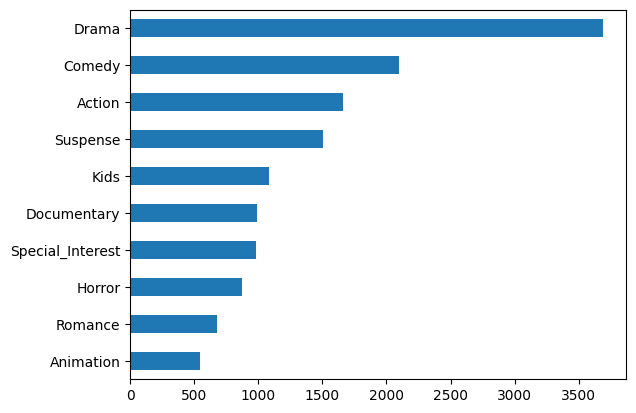

In [19]:
genre = genre.apply(rename_col)
a = [sum(df[g]) for g in genre]
a = pd.DataFrame(a, index=genre)
a[0].nlargest(10).sort_values().plot(kind='barh')

# Directorial Impact

Are there any directors who are particularly prolific on Amazon Prime? How does the presence of well-known directors affect the ratings of titles?


In [20]:
df.Director.value_counts().nlargest(10)

Director
Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Manny Rodriguez           22
John English              20
1                         16
Brian Volk-Weiss          15
Baeble Music              14
Name: count, dtype: int64

# Cast Influence
How does the presence of certain actors correlate with the popularity or ratings of the titles?


# Temporal Trends in Content Addition

How has the rate of adding new titles changed over time? Is there seasonality in when content is added to Amazon Prime?


<Axes: xlabel='Month', ylabel='Date_Added'>

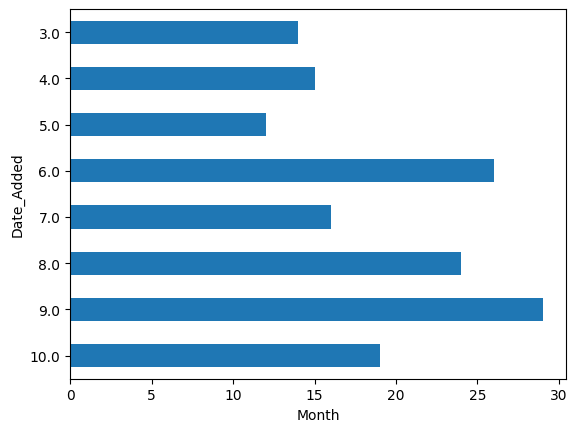

In [21]:
df.Date_Added = pd.to_datetime(df.Date_Added)
df.groupby(df.Date_Added.dt.month).count().Show_Id.sort_index(ascending=False).plot(kind='barh', xlabel='Month')

In [22]:
sum(df.Date_Added.isna())

9513

# Descriptive Analytics

What can the descriptions of the titles reveal about the themes or focus areas of Amazon Prime content? Can we identify common keywords or themes across top-rated titles?


In [23]:
df.Description = df.Description.str.lower()
df.Description = df.Description.replace('\.', ' ', regex=True)
df.Description = df.Description.replace(',',  ' ', regex=True)
df.Description = df.Description.replace('-',  ' ', regex=True)

In [24]:
word_counts = df.Description.str.split().explode().value_counts()

for i,w in enumerate(word_counts.nlargest(100).index, start=1):
  print(w, end='\n' if i % 10 == 0 else ' ')

the a and of to in is his with her
for on an as he that by their from who
this when they but life are she at one into
has up new after it will love him story all
world out young be about family two man them have
find series time was friends most film you must old
more through what get can where first home only not
or years woman lives while girl which year back each
help your other how day town over father own go
best take together finds takes comedy no war make between


In [25]:
common = pd.read_html('https://en.wikipedia.org/wiki/Most_common_words_in_English')[0]
common.head()

,Word,Parts of speech,OEC rank,COCA rank[9],Dolch level,Polysemy
0,the,Article,1,1,Pre-primer,12
1,be,Verb,2,2,Primer,21
2,to,Preposition,3,"7, 9",Pre-primer,17
3,of,Preposition,4,4,Grade 1,12
4,and,Coordinator,5,3,Pre-primer,16


In [26]:
word_counts = word_counts.reset_index()
word_counts = word_counts[~word_counts.Description.isin(common.Word)]

In [27]:
word_counts = word_counts[~word_counts.Description.isin(common.Word)]
word_counts.nlargest(20, 'count')

,Description,count
6,is,5579
24,life,1492
25,are,1463
30,has,1161
36,love,1013
38,story,992
40,world,964
42,young,910
45,family,863
47,man,709
